# CTG Quantitative Analysis #1: The effects of sequence length

In [1]:
# Imports
%matplotlib inline

import pandas as pd
import numpy as np
from pdb import set_trace
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# GLOBAL VARIABLES
PLOT_DIMS = (11.7, 8.27)
TITLE_SIZE = 30
LABEL_SIZE = 25
TICK_SIZE=20
CI=90
ERR_STYLE='bars'

In [3]:
## initial explorations
# read csv of ctg results of a certain configuration/pplm-setup
# Lets compare GPT2 | Discrim | Unprompted | Young vs Old
# gpt2_disc_unp_y = pd.read_csv("../output/ctg_out_am_discrim_pm_gpt2-medium_wl_NA_age_young_WS.csv", encoding="utf-8")
# gpt2_disc_unp_o = pd.read_csv("../output/ctg_out_am_discrim_pm_gpt2-medium_wl_NA_age_old_WS.csv", encoding="utf-8")


# gpt2_bow_fb85_y = pd.read_csv("../output/ctg_out_am_bow_pm_gpt2-medium_wl_bnc_young_mcwu_ws_pct_85_age_young_WS.csv", encoding="utf-8")
# gpt2_bow_fb85_o = pd.read_csv("../output/ctg_out_am_bow_pm_gpt2-medium_wl_bnc_old_mcwu_ws_pct_85_age_old_WS.csv", encoding="utf-8")

# dgpt_disc_pr_y = pd.read_csv("../output/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_wl_NA_age_young_WS.csv")
# dgpt_disc_pr_o = pd.read_csv("../output/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_wl_NA_age_old_WS.csv")

In [4]:
# Neutral prompted results
# GPT2-Discrim
gpt2_disc_np_y = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_discrim_pm_gpt2-medium_prompt_neutral_wl_NA_age_young_WS.csv", encoding="utf-8")
gpt2_disc_np_o = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_discrim_pm_gpt2-medium_prompt_neutral_wl_NA_age_old_WS.csv", encoding="utf-8")

# GPT2-BoW-FB
gpt2_bow_fb_np_y = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_bow_pm_gpt2-medium_prompt_neutral_wl_bnc_young_mcwu_ws_pct_85_age_young_WS.csv", encoding="utf-8")
gpt2_bow_fb_np_o = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_bow_pm_gpt2-medium_prompt_neutral_wl_bnc_old_mcwu_ws_pct_85_age_old_WS.csv", encoding="utf-8")

# DGPT-Discrim
dgpt_disc_np_y = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_NA_age_young_WS.csv", encoding="utf-8")
dgpt_disc_np_o = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_NA_age_old_WS.csv", encoding="utf-8")

# DGPT-BoW-MIU
dgpt_bow_miu_np_y = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_bow_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_bnc_rb_WS_100_mi_unigrams_young_age_young_WS.csv", encoding="utf-8")
dgpt_bow_miu_np_o = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_bow_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_bnc_rb_WS_100_mi_unigrams_old_age_old_WS.csv", encoding="utf-8")

In [6]:
# Drop first 30 rows because sequences too short
gpt2_disc_np_y = gpt2_disc_np_y.iloc[30:] 
gpt2_disc_np_o = gpt2_disc_np_o.iloc[30:]

gpt2_bow_fb_np_y = gpt2_bow_fb_np_y.iloc[30:]
gpt2_bow_fb_np_o = gpt2_bow_fb_np_o.iloc[30:]

dgpt_disc_np_y = dgpt_disc_np_y.iloc[30:]
dgpt_disc_np_o = dgpt_disc_np_o.iloc[30:]

dgpt_bow_miu_np_y = dgpt_bow_miu_np_y.iloc[30:]
dgpt_bow_miu_np_o = dgpt_bow_miu_np_o.iloc[30:]

In [13]:
print("GPT2-Disc Y/O ppl")
print(gpt2_disc_np_y.perplexity.mean())
print(gpt2_disc_np_o.perplexity.mean())

print("GPT2-BoW-FB Y/O ppl")
print(gpt2_bow_fb_np_y.perplexity.mean())
print(gpt2_bow_fb_np_o.perplexity.mean())

print("DGPT-Disc Y/O ppl")
print(dgpt_disc_np_y.perplexity.mean())
print(dgpt_disc_np_o.perplexity.mean())

print("DGPT-BoW-MIU Y/O ppl")
print(dgpt_bow_miu_np_y.perplexity.mean())
print(dgpt_bow_miu_np_o.perplexity.mean())

GPT2-Disc Y/O ppl
32.0906511147817
47.149694545561495
GPT2-BoW-FB Y/O ppl
27.91258231268989
27.583914594297056
DGPT-Disc Y/O ppl
42.005378170084334
41.17472008599175
DGPT-BoW-MIU Y/O ppl
38.66622588546188
37.90971698054561


In [8]:
def add_correct_col(prob):
    '''
    Adds column to ctg results dataframe indicating if BERT correctly classified generated sequence. 1 if correct, 0 otherwise.
    Args:
        prob (float): assigned probability of belonging to relevant age group
    '''
    
    assert 0 <= prob <= 1
    
    return 1 if prob >= 0.5 else 0
    

In [9]:
# Add correct column
gpt2_disc_np_y['correct'] = gpt2_disc_np_y['young_prob'].apply(add_correct_col)
gpt2_disc_np_o['correct'] = gpt2_disc_np_o['old_prob'].apply(add_correct_col)

In [10]:
gpt2_bow_fb_np_y['correct'] = gpt2_bow_fb_np_y['young_prob'].apply(add_correct_col)
gpt2_bow_fb_np_o['correct'] = gpt2_bow_fb_np_o['old_prob'].apply(add_correct_col)

In [11]:
dgpt_disc_np_y['correct'] = dgpt_disc_np_y['young_prob'].apply(add_correct_col)
dgpt_disc_np_o['correct'] = dgpt_disc_np_o['old_prob'].apply(add_correct_col)

In [12]:
dgpt_bow_miu_np_y['correct'] = dgpt_bow_miu_np_y['young_prob'].apply(add_correct_col)
dgpt_bow_miu_np_o['correct'] = dgpt_bow_miu_np_o['old_prob'].apply(add_correct_col)

In [15]:
print("GPT2-Disc Y/O acc")
print(gpt2_disc_np_y.correct.mean())
print(gpt2_disc_np_o.correct.mean())

print("GPT2-BoW-FB Y/O acc")
print(gpt2_bow_fb_np_y.correct.mean())
print(gpt2_bow_fb_np_o.correct.mean())

print("DGPT-Disc Y/O acc")
print(dgpt_disc_np_y.correct.mean())
print(dgpt_disc_np_o.correct.mean())

print("DGPT-BoW-MIU Y/O acc")
print(dgpt_bow_miu_np_y.correct.mean())
print(dgpt_bow_miu_np_o.correct.mean())

GPT2-Disc Y/O acc
0.6777777777777778
0.7434944237918215
GPT2-BoW-FB Y/O acc
0.7037037037037037
0.42962962962962964
DGPT-Disc Y/O acc
0.8587360594795539
0.5666666666666667
DGPT-BoW-MIU Y/O acc
0.8851851851851852
0.21851851851851853


In [27]:
# Binning the data
bins = [0, 10, 20, 30, 40, 100]
bin_labels = ["0-10", "10-20", "20-30", "30-40", "40+"]
gpt2_disc_np_y['length_binned'] = pd.cut(gpt2_disc_np_y['text_length'], bins=bins, labels=bin_labels)
gpt2_disc_np_o['length_binned'] = pd.cut(gpt2_disc_np_o['text_length'], bins=bins, labels=bin_labels)

gpt2_bow_fb_np_y['length_binned'] = pd.cut(gpt2_bow_fb_np_y['text_length'], bins=bins, labels=bin_labels)
gpt2_bow_fb_np_o['length_binned'] = pd.cut(gpt2_bow_fb_np_o['text_length'], bins=bins, labels=bin_labels)

dgpt_disc_np_y['length_binned'] = pd.cut(dgpt_disc_np_y['text_length'], bins=bins, labels=bin_labels)
dgpt_disc_np_o['length_binned'] = pd.cut(dgpt_disc_np_o['text_length'], bins=bins, labels=bin_labels)

dgpt_bow_miu_np_y['length_binned'] = pd.cut(dgpt_bow_miu_np_y['text_length'], bins=bins, labels=bin_labels)
dgpt_bow_miu_np_o['length_binned'] = pd.cut(dgpt_bow_miu_np_o['text_length'], bins=bins, labels=bin_labels)

In [28]:
gpt2_disc_np_y['length_binned'].value_counts()

10-20    70
20-30    68
0-10     47
30-40    46
40+      39
Name: length_binned, dtype: int64

In [29]:
gpt2_disc_np_o['length_binned'].value_counts()

10-20    77
20-30    64
0-10     61
40+      35
30-40    32
Name: length_binned, dtype: int64

In [30]:
gpt2_bow_fb_np_y['length_binned'].value_counts()

20-30    68
10-20    60
30-40    59
40+      59
0-10     24
Name: length_binned, dtype: int64

In [31]:
gpt2_bow_fb_np_o['length_binned'].value_counts()

20-30    68
10-20    60
40+      60
30-40    58
0-10     24
Name: length_binned, dtype: int64

In [32]:
dgpt_disc_np_y['length_binned'].value_counts()

0-10     100
10-20     91
20-30     51
30-40     19
40+        8
Name: length_binned, dtype: int64

In [33]:
dgpt_disc_np_o['length_binned'].value_counts()

10-20    92
20-30    65
0-10     60
30-40    36
40+      17
Name: length_binned, dtype: int64

In [34]:
dgpt_bow_miu_np_y['length_binned'].value_counts()

20-30    86
10-20    79
30-40    49
0-10     46
40+      10
Name: length_binned, dtype: int64

In [35]:
dgpt_bow_miu_np_o['length_binned'].value_counts()

10-20    82
20-30    79
30-40    51
0-10     49
40+       9
Name: length_binned, dtype: int64

In [26]:
dgpt_bow_miu_np_y['perplexity'].describe()

count    270.000000
mean      38.666226
std       11.698509
min       22.579693
25%       32.011643
50%       35.506655
75%       42.510604
max      126.896141
Name: perplexity, dtype: float64

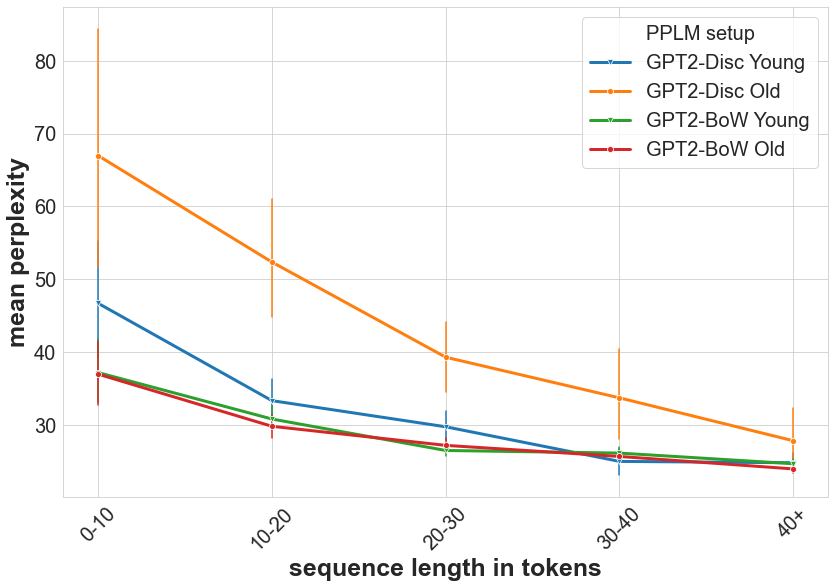

In [39]:
# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

sns.lineplot(data=gpt2_disc_np_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_disc_np_o, x='length_binned', y='perplexity', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=gpt2_bow_fb_np_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_bow_fb_np_o, x='length_binned', y='perplexity', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_disc_np_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='length_binned', y='perplexity', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='length_binned', y='perplexity', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_len_ppl_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

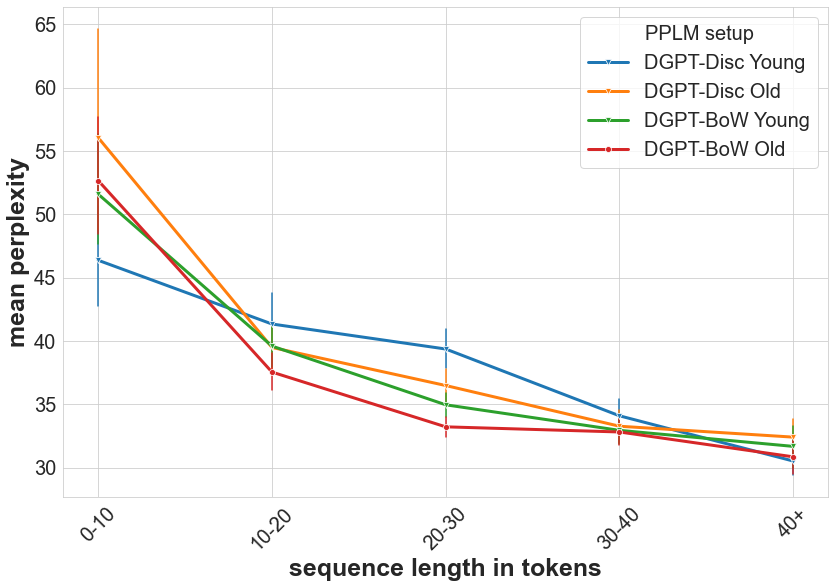

In [40]:
# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='length_binned', y='perplexity', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='length_binned', y='perplexity', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_disc_np_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_disc_np_o, x='length_binned', y='perplexity', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_bow_miu_np_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_bow_miu_np_o, x='length_binned', y='perplexity', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_len_ppl_best_dgpt_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

In [ ]:
# # gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
# plt.figure(figsize=PLOT_DIMS)
# sns.set_style("whitegrid")

# sns.boxplot(data=dgpt_disc_pr_o, x='length_binned', y='perplexity')
# # sns.boxplot(data=gpt2_disc_unp_o, x='length_binned', y='perplexity')
# # sns.lineplot(data=gpt2_disc_unp_o, x='length_binned', y='perplexity', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# # sns.lineplot(data=gpt2_bow_fb85_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# # sns.lineplot(data=gpt2_bow_fb85_o, x='length_binned', y='perplexity', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# # sns.lineplot(data=dgpt_disc_pr_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# # sns.lineplot(data=dgpt_disc_pr_o, x='length_binned', y='perplexity', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# plt.xticks(rotation=45, fontsize = TICK_SIZE)
# plt.yticks(rotation = 0, fontsize = TICK_SIZE)
# plt.title("", fontsize = TITLE_SIZE)
# plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE, weight='bold')
# plt.ylabel("mean perplexity", fontsize = LABEL_SIZE, weight='bold')
# # plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.tight_layout()

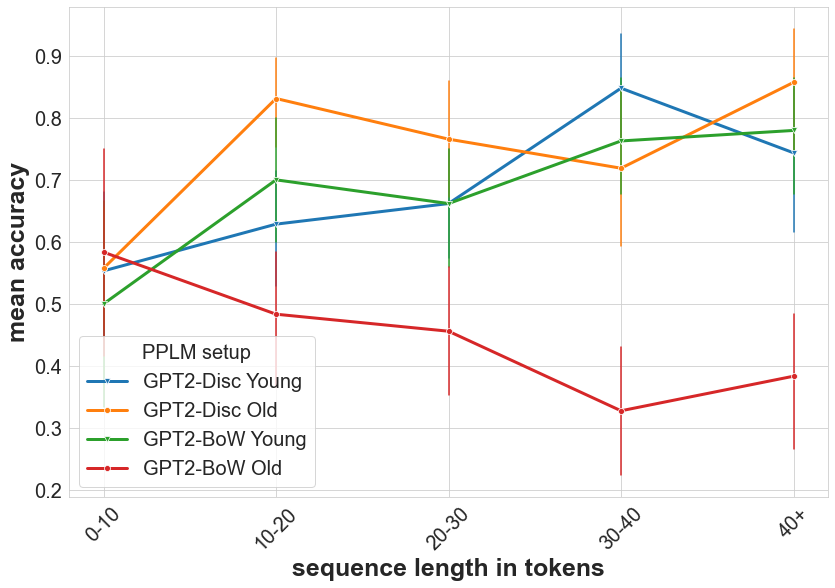

In [42]:
# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

sns.lineplot(data=gpt2_disc_np_y, x='length_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_disc_np_o, x='length_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=gpt2_bow_fb_np_y, x='length_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_bow_fb_np_o, x='length_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_disc_np_y, x='length_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='length_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='length_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='length_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_len_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

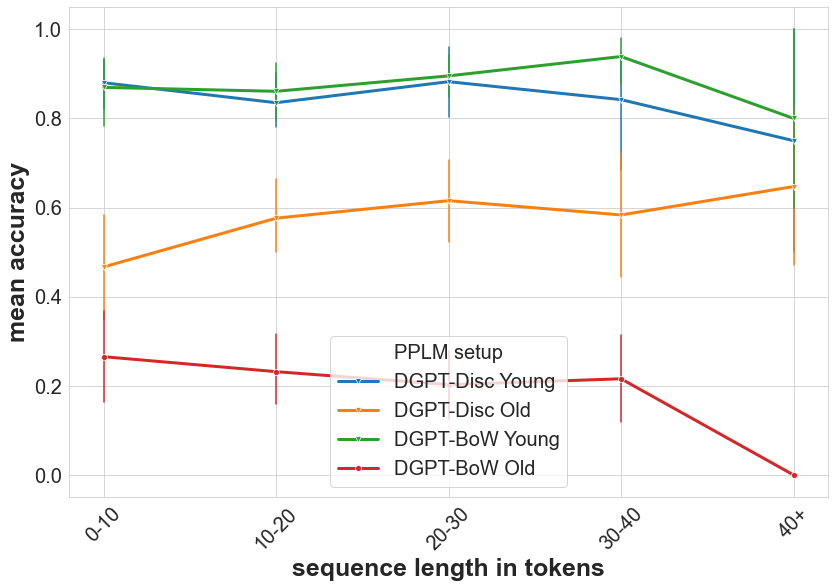

In [43]:
# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='length_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='length_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='length_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='length_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_disc_np_y, x='length_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_disc_np_o, x='length_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_bow_miu_np_y, x='length_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_bow_miu_np_o, x='length_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_len_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

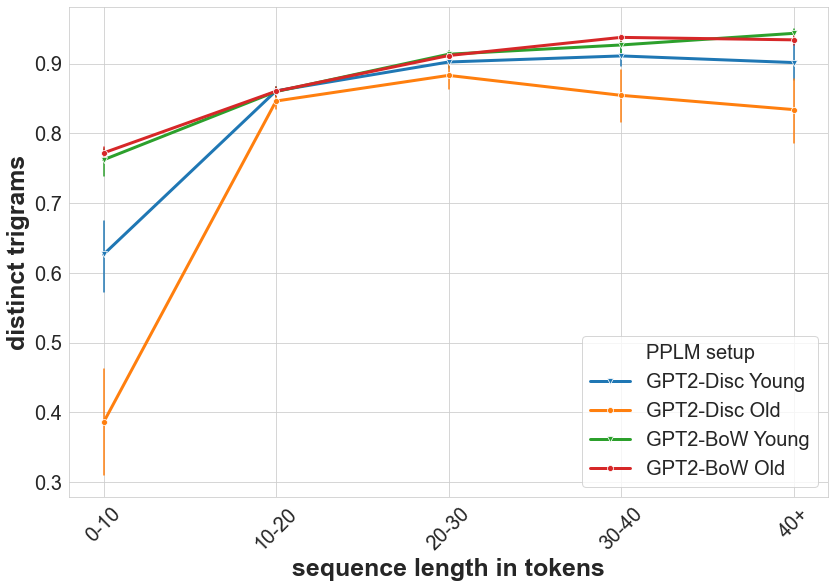

In [44]:
CI# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

sns.lineplot(data=gpt2_disc_np_y, x='length_binned', y='dist_3', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_disc_np_o, x='length_binned', y='dist_3', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=gpt2_bow_fb_np_y, x='length_binned', y='dist_3', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_bow_fb_np_o, x='length_binned', y='dist_3', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_disc_np_y, x='length_binned', y='dist_3', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='length_binned', y='dist_3', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='length_binned', y='dist_3', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='length_binned', y='dist_3', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)


plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("distinct trigrams", fontsize = LABEL_SIZE, weight='bold')
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_len_dist3_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

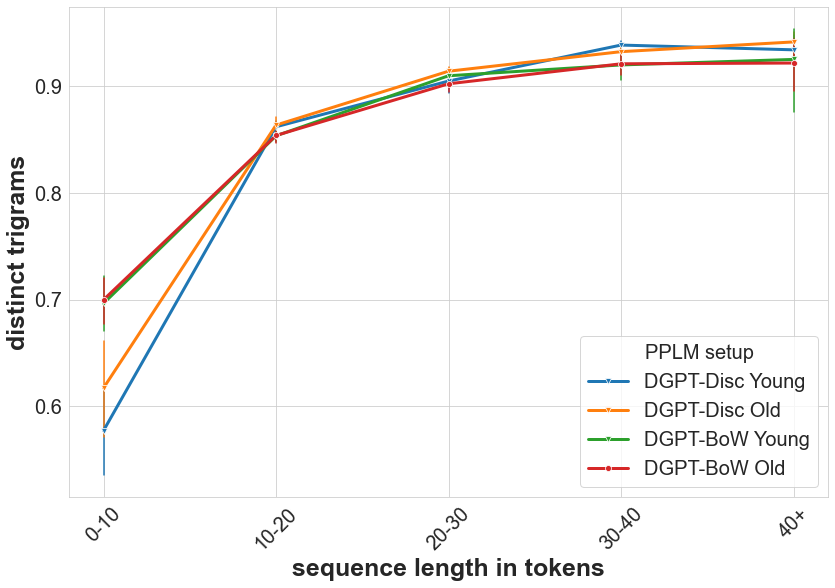

In [45]:
CI# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='length_binned', y='dist_3', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='length_binned', y='dist_3', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='length_binned', y='dist_3', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='length_binned', y='dist_3', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_disc_np_y, x='length_binned', y='dist_3', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_disc_np_o, x='length_binned', y='dist_3', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_bow_miu_np_y, x='length_binned', y='dist_3', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_bow_miu_np_o, x='length_binned', y='dist_3', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)


plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("distinct trigrams", fontsize = LABEL_SIZE, weight='bold')
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_len_dist3_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

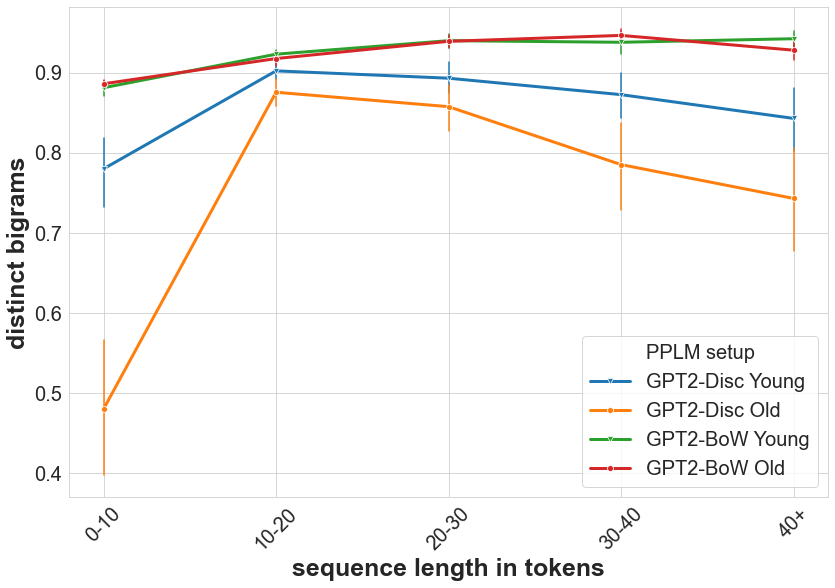

In [46]:
# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

sns.lineplot(data=gpt2_disc_np_y, x='length_binned', y='dist_2', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_disc_np_o, x='length_binned', y='dist_2', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=gpt2_bow_fb_np_y, x='length_binned', y='dist_2', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_bow_fb_np_o, x='length_binned', y='dist_2', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_disc_np_y, x='length_binned', y='dist_2', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='length_binned', y='dist_2', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='length_binned', y='dist_2', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='length_binned', y='dist_2', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("distinct bigrams", fontsize = LABEL_SIZE, weight='bold')
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_len_dist2_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

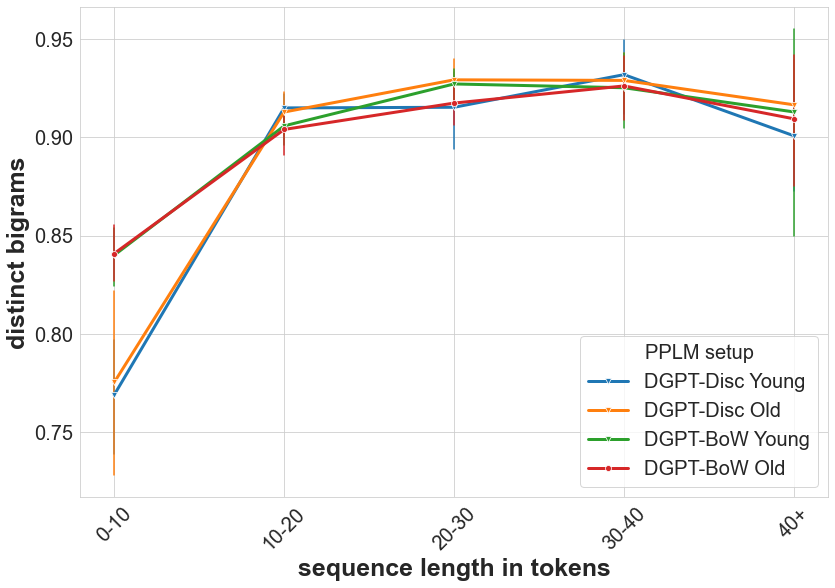

In [47]:
# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='length_binned', y='dist_2', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='length_binned', y='dist_2', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='length_binned', y='dist_2', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='length_binned', y='dist_2', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_disc_np_y, x='length_binned', y='dist_2', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_disc_np_o, x='length_binned', y='dist_2', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_bow_miu_np_y, x='length_binned', y='dist_2', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_bow_miu_np_o, x='length_binned', y='dist_2', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("distinct bigrams", fontsize = LABEL_SIZE, weight='bold')
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_len_dist2_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

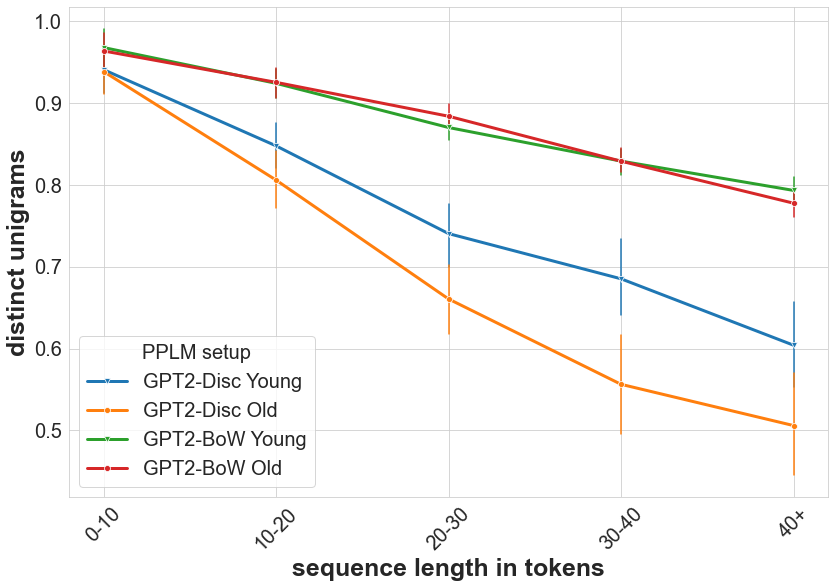

In [48]:
# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

sns.lineplot(data=gpt2_disc_np_y, x='length_binned', y='dist_1', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_disc_np_o, x='length_binned', y='dist_1', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=gpt2_bow_fb_np_y, x='length_binned', y='dist_1', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_bow_fb_np_o, x='length_binned', y='dist_1', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_disc_np_y, x='length_binned', y='dist_1', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='length_binned', y='dist_1', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='length_binned', y='dist_1', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='length_binned', y='dist_1', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("distinct unigrams", fontsize = LABEL_SIZE, weight='bold')
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_len_dist1_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

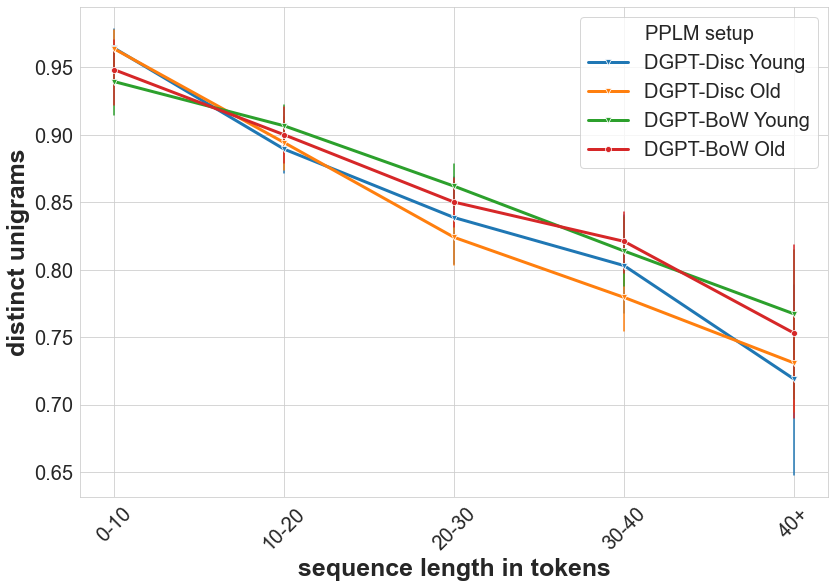

In [49]:
# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='length_binned', y='dist_1', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='length_binned', y='dist_1', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='length_binned', y='dist_1', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='length_binned', y='dist_1', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_disc_np_y, x='length_binned', y='dist_1', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_disc_np_o, x='length_binned', y='dist_1', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_bow_miu_np_y, x='length_binned', y='dist_1', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_bow_miu_np_o, x='length_binned', y='dist_1', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("distinct unigrams", fontsize = LABEL_SIZE, weight='bold')
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_len_dist1_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

In [ ]:
gpt2_disc_unp_y.text_length.describe()

In [ ]:
sns.pointplot(data=gpt2_disc_unp_o, x='text_length', y='perplexity')

In [ ]:
sns.lineplot(data=gpt2_disc_unp_y, x='text_length', y='dist_1')

In [ ]:
sns.histplot(data=gpt2_disc_unp_y, x='text_length', bins=8)